In [1]:
import re
from glob import glob
from pathlib import Path

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from nilearn.glm.second_level import SecondLevelModel
from nilearn.image import math_img
from nilearn.plotting import plot_stat_map
from randomise_prep import setup_randomise_tfce

from survey_medley_code.config_loader import load_config


In [2]:
cfg = load_config()

mask_path = (
    cfg.output_root / 'assess_subject_bold_dropout/group_mask_intersection_30pct.nii.gz'
)
question_output_path = (
    cfg.output_root
    / 'within_subject_adjusted_questionnaire_averages/within_subject_results'
)

In [44]:
bold_paths = list(
    question_output_path.glob('*/contrast_chr_count_centered_effect_size_sub_*.nii.gz')
)

In [45]:
len(bold_paths)

97

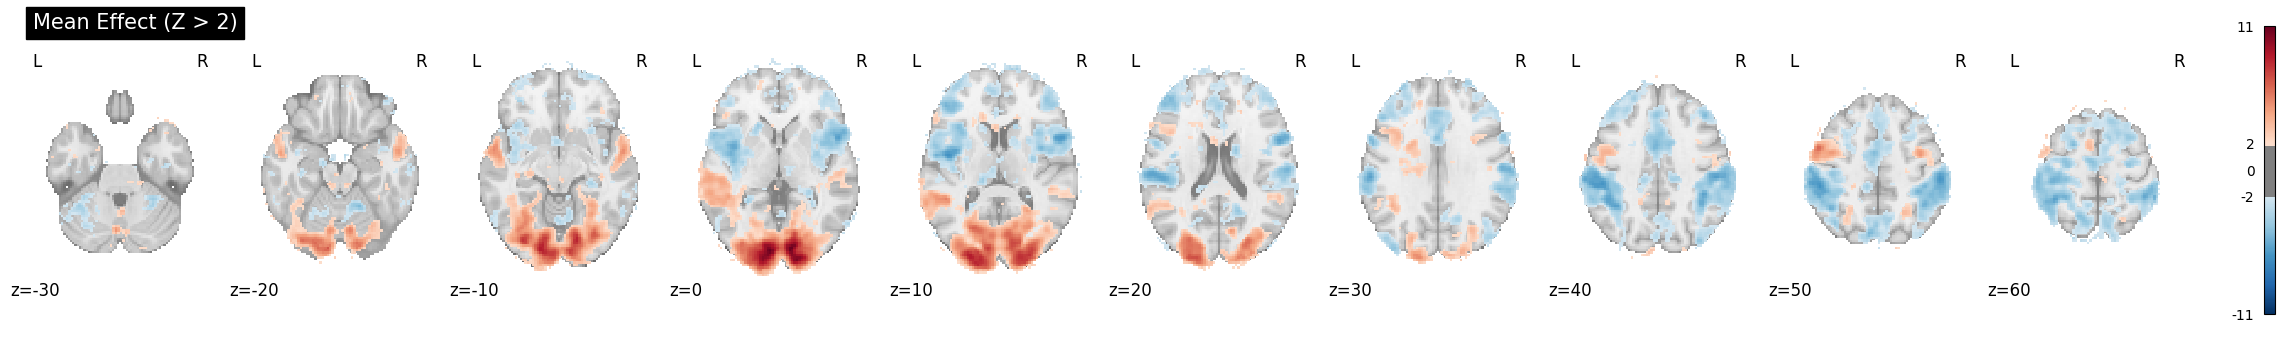

In [47]:
# Assuming bold_paths is your list of paths to nifti files
# bold_paths = [...]

# Define z-slices for plotting
z_slices = list(range(-30, 61, 10))

n_subjects = len(bold_paths)

design_matrix = pd.DataFrame({'constant': np.ones(n_subjects)})
# Create and fit the SecondLevelModel
model = SecondLevelModel()
model.fit(bold_paths, design_matrix=design_matrix)

# Compute the mean effect
mean_effect = model.compute_contrast('constant', output_type='z_score')

# Threshold the map

# Plot the thresholded statistical map
display = plot_stat_map(
    mean_effect,
    display_mode='z',
    cut_coords=z_slices,
    threshold=2,
    colorbar=True,
    title='Mean Effect (Z > 2)',
    symmetric_cbar=True,
)

plt.show()